In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.datasets import fetch_olivetti_faces

In [7]:
# Step 1: Load the Olivetti faces dataset and perform PCA
data = fetch_olivetti_faces(shuffle=True, random_state=42)
X = data.data
y = data.target

# Reduce dimensionality with PCA preserving 99% of the variance
pca = PCA(0.99, whiten=True)
X_pca = pca.fit_transform(X)

# Print information about dimensionality reduction
print(f"Original number of features: {X.shape[1]}")
print(f"Reduced number of features after PCA: {X_pca.shape[1]}")
print(f"Variance preserved: {pca.explained_variance_ratio_.sum():.4f}")

Original number of features: 4096
Reduced number of features after PCA: 260
Variance preserved: 0.9900


In [6]:
# Step 2: Determine the most suitable covariance type
covariance_types = ['spherical', 'tied', 'diag', 'full']
lowest_bic = np.infty
best_cov_type = None

for cov_type in covariance_types:
    gmm = GaussianMixture(n_components=2, covariance_type=cov_type)
    gmm.fit(X_pca)
    bic = gmm.bic(X_pca)
    if bic < lowest_bic:
        lowest_bic = bic
        best_cov_type = cov_type

print(f"Best Covariance Type: {best_cov_type}")

Best Covariance Type: spherical


In [8]:
# Step 3: Determine the optimal number of clusters
lowest_bic = np.infty
best_n_components = 2

for n_components in range(2, 11):  # You can adjust the upper limit
    gmm = GaussianMixture(n_components=n_components, covariance_type=best_cov_type)
    gmm.fit(X_pca)
    bic = gmm.bic(X_pca)
    if bic < lowest_bic:
        lowest_bic = bic
        best_n_components = n_components

print(f"Optimal number of clusters: {best_n_components}")

Optimal number of clusters: 10


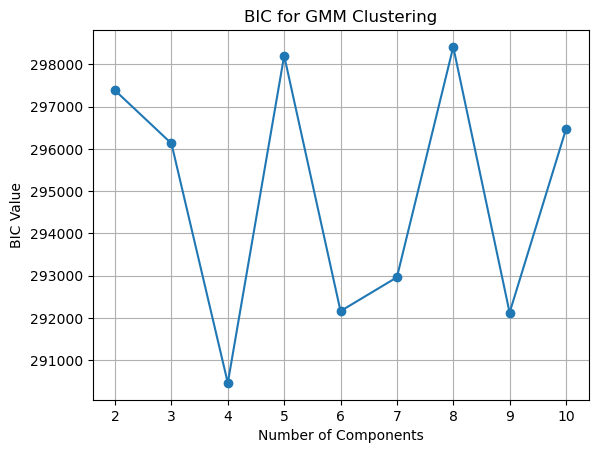

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Step 4: Plot the Results
# Plot BIC values for different numbers of clusters
bic_values = []
n_components_range = range(2, 11) 

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, covariance_type=best_cov_type)
    gmm.fit(X_pca)
    bic = gmm.bic(X_pca)
    bic_values.append(bic)

# Plot BIC values
plt.figure()
plt.plot(n_components_range, bic_values, marker='o')
plt.title('BIC for GMM Clustering')
plt.xlabel('Number of Components')
plt.ylabel('BIC Value')
plt.xticks(n_components_range)
plt.grid(True)
plt.show()

In [11]:
# Step 5: Output Hard Clustering
gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_cov_type)
gmm.fit(X_pca)
cluster_assignments = gmm.predict(X_pca)

# Print the cluster assignments for each instance
for i, cluster in enumerate(cluster_assignments):
    print(f"Instance {i}: Cluster {cluster}")

Instance 0: Cluster 2
Instance 1: Cluster 2
Instance 2: Cluster 8
Instance 3: Cluster 3
Instance 4: Cluster 7
Instance 5: Cluster 2
Instance 6: Cluster 2
Instance 7: Cluster 7
Instance 8: Cluster 3
Instance 9: Cluster 3
Instance 10: Cluster 3
Instance 11: Cluster 3
Instance 12: Cluster 2
Instance 13: Cluster 3
Instance 14: Cluster 3
Instance 15: Cluster 8
Instance 16: Cluster 3
Instance 17: Cluster 2
Instance 18: Cluster 8
Instance 19: Cluster 3
Instance 20: Cluster 2
Instance 21: Cluster 2
Instance 22: Cluster 8
Instance 23: Cluster 3
Instance 24: Cluster 2
Instance 25: Cluster 8
Instance 26: Cluster 6
Instance 27: Cluster 2
Instance 28: Cluster 3
Instance 29: Cluster 3
Instance 30: Cluster 2
Instance 31: Cluster 3
Instance 32: Cluster 3
Instance 33: Cluster 3
Instance 34: Cluster 2
Instance 35: Cluster 2
Instance 36: Cluster 6
Instance 37: Cluster 3
Instance 38: Cluster 3
Instance 39: Cluster 8
Instance 40: Cluster 2
Instance 41: Cluster 2
Instance 42: Cluster 3
Instance 43: Cluster 

In [12]:
# Step 6: Output Soft Clustering
gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_cov_type)
gmm.fit(X_pca)
soft_cluster_assignments = gmm.predict_proba(X_pca)

# Print the soft clustering probabilities for each instance
for i, probabilities in enumerate(soft_cluster_assignments):
    print(f"Instance {i}: Cluster Probabilities: {probabilities}")

Instance 0: Cluster Probabilities: [3.39737058e-109 0.00000000e+000 9.98902681e-001 9.43203721e-032
 1.09731815e-003 0.00000000e+000 0.00000000e+000 1.20694564e-009
 7.01105689e-094 5.51200084e-015]
Instance 1: Cluster Probabilities: [1.30183869e-93 0.00000000e+00 9.99999999e-01 7.63616236e-28
 6.05527797e-10 0.00000000e+00 0.00000000e+00 2.88147464e-16
 8.25732340e-92 1.10441297e-15]
Instance 2: Cluster Probabilities: [2.42479928e-96 0.00000000e+00 1.00000000e+00 2.97156969e-31
 3.03695247e-12 0.00000000e+00 0.00000000e+00 1.05967907e-19
 1.28609792e-91 1.82663685e-17]
Instance 3: Cluster Probabilities: [6.40281873e-146 0.00000000e+000 2.01234152e-013 9.92927074e-046
 9.99972015e-001 0.00000000e+000 0.00000000e+000 2.79848426e-005
 7.46802983e-142 3.75373155e-022]
Instance 4: Cluster Probabilities: [8.91007727e-121 0.00000000e+000 3.97329731e-005 1.78183889e-036
 9.99950359e-001 0.00000000e+000 0.00000000e+000 9.90790526e-006
 1.91951705e-102 1.27697315e-013]
Instance 5: Cluster Proba

Generated Face 0:


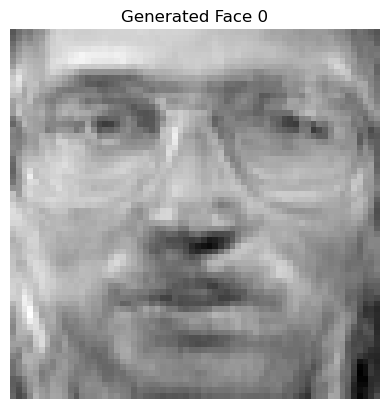

Generated Face 1:


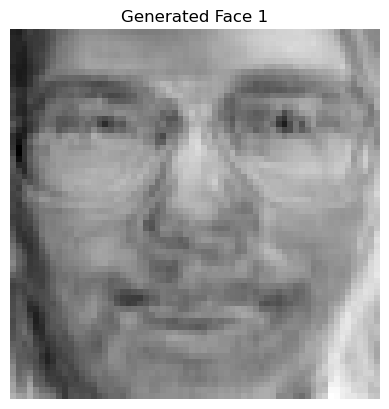

Generated Face 2:


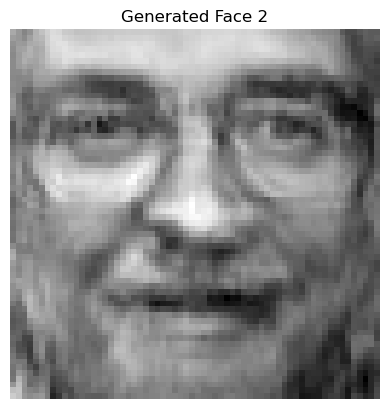

Generated Face 3:


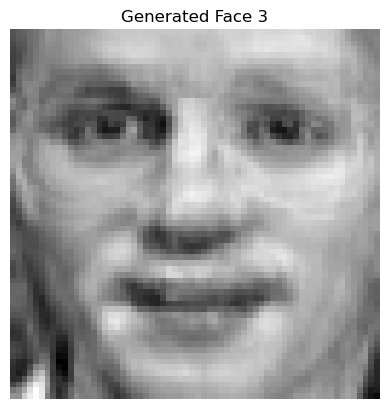

Generated Face 4:


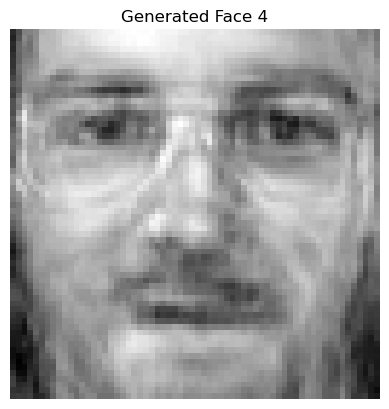

In [14]:
import matplotlib.pyplot as plt

# Step 7: Generate New Faces
gmm = GaussianMixture(n_components=best_n_components, covariance_type=best_cov_type)
gmm.fit(X_pca)
new_faces, _ = gmm.sample(n_samples=5) 
generated_faces = pca.inverse_transform(new_faces)

# Print information about the generated faces
for i, generated_face in enumerate(generated_faces):
    print(f"Generated Face {i}:")

    # Reshape the generated face to match the original shape
    generated_face = generated_face.reshape(data.images.shape[1], data.images.shape[2])

    # Display the generated face using matplotlib
    plt.figure()
    plt.imshow(generated_face, cmap='gray')
    plt.title(f"Generated Face {i}")
    plt.axis('off')
    plt.show()

Generated Face 0 (Original):


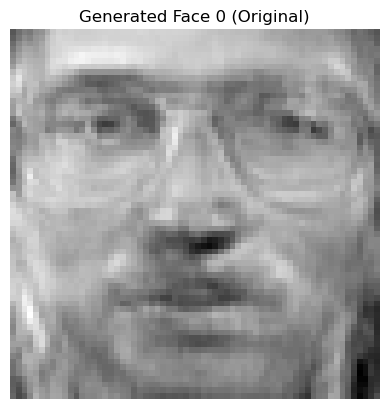

Generated Face 1 (Original):


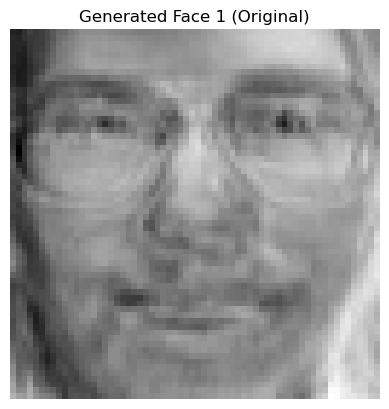

Generated Face 2 (Original):


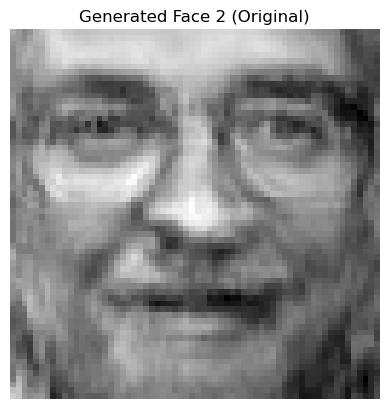

Generated Face 3 (Original):


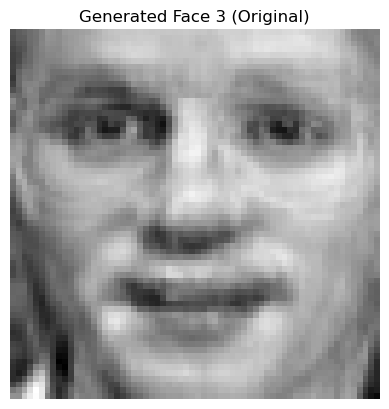

Generated Face 4 (Original):


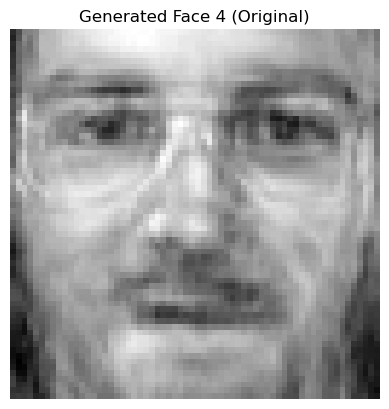

Rotated Face 0:


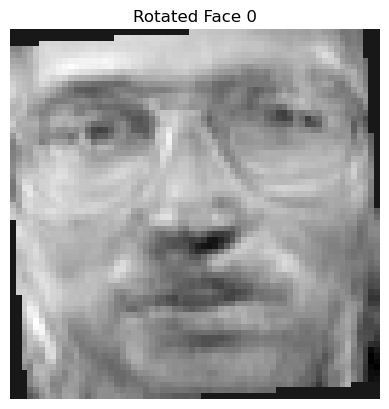

Flipped Face 0:


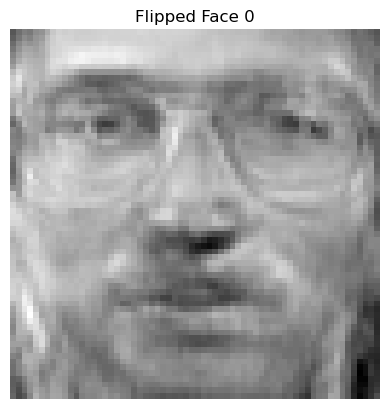

Darkened Face 0:


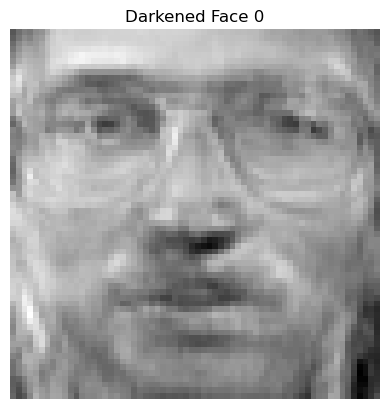

Rotated Face 1:


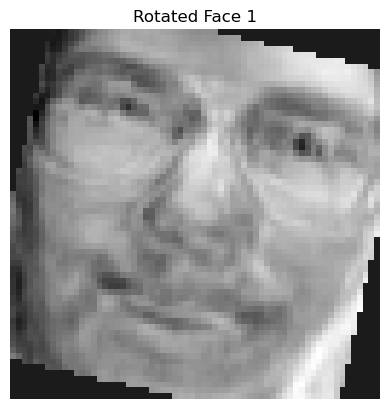

Flipped Face 1:


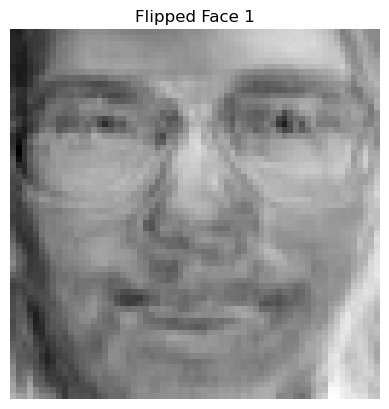

Darkened Face 1:


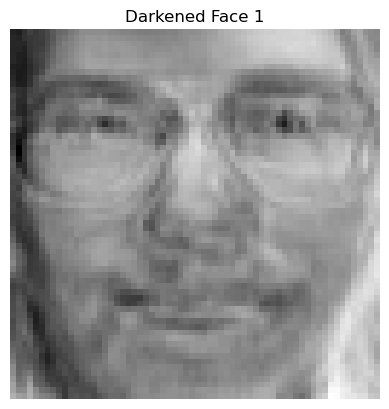

Rotated Face 2:


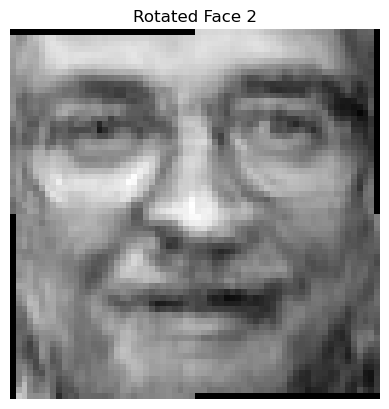

Flipped Face 2:


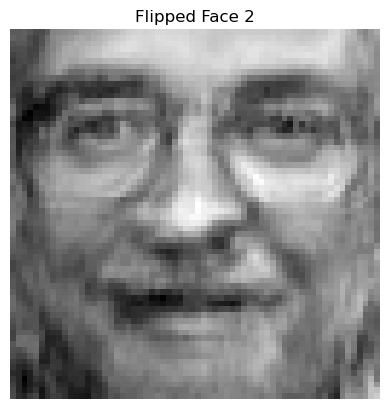

Darkened Face 2:


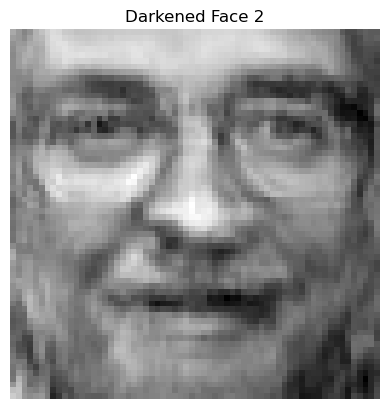

Rotated Face 3:


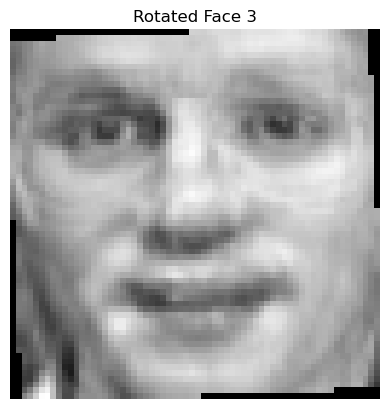

Flipped Face 3:


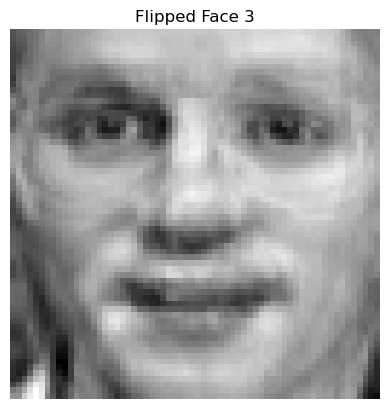

Darkened Face 3:


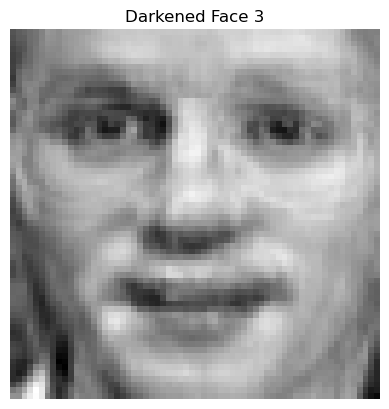

Rotated Face 4:


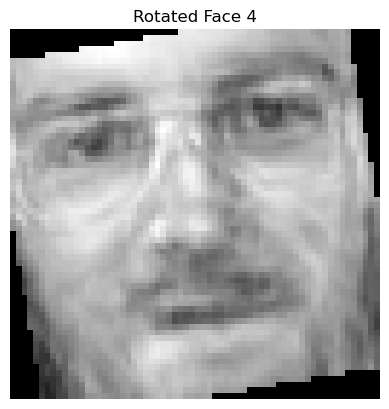

Flipped Face 4:


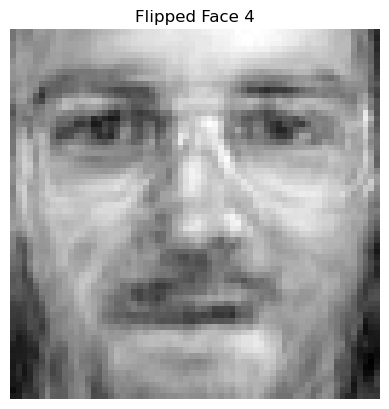

Darkened Face 4:


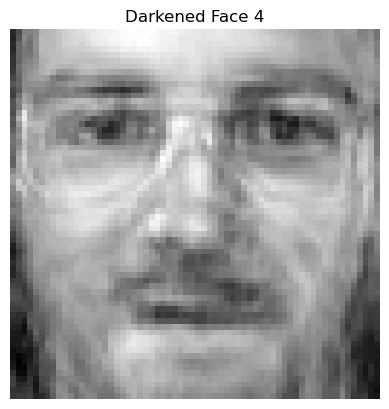

In [16]:
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from numpy.random import random

# Step 8: Modify Images
modified_faces = []
modification_labels = []

# Iterate over the generated faces
for i, generated_face in enumerate(generated_faces):
    print(f"Generated Face {i} (Original):")
    
    # Display the original generated face
    plt.figure()
    
    # Ensure the generated face has the correct shape for display
    original_shape = (data.images.shape[1], data.images.shape[2])
    generated_face = generated_face.reshape(original_shape)
    
    plt.imshow(generated_face, cmap='gray')
    plt.title(f"Generated Face {i} (Original)")
    plt.axis('off')
    plt.show()

    # Apply modifications to the generated face
    modified_face = generated_face.copy()

    # Example modification: Rotate the image
    rotated_face = rotate(generated_face, angle=30.0 * random() - 15.0, reshape=False)

    # Example modification: Flip the image horizontally
    if random() < 0.5:
        flipped_face = np.fliplr(generated_face)
    else:
        flipped_face = generated_face

    # Example modification: Darken the image
    darkened_face = generated_face * 0.5  # Adjust the factor as needed

    # Store the modified faces and their corresponding labels
    modified_faces.extend([rotated_face, flipped_face, darkened_face])
    modification_labels.extend([f"Rotated Face {i}", f"Flipped Face {i}", f"Darkened Face {i}"])

# Display the modified faces
for i, modified_face in enumerate(modified_faces):
    print(f"{modification_labels[i]}:")

    # Display the modified face using matplotlib
    plt.figure()
    plt.imshow(modified_face, cmap='gray')
    plt.title(modification_labels[i])
    plt.axis('off')
    plt.show()

In [19]:
# Step 9: Detect Anomalies
anomalies = []

# Define a threshold for anomaly detection 
threshold = -50.0

# Score normal and modified images using the GMM model
for i, face in enumerate(generated_faces):
    # Score the face using the GMM model
    score = gmm.score_samples(pca.transform(face.reshape(1, -1)))
    
    # Check if the score is below the threshold
    if score < threshold:
        anomalies.append((i, score))

# Print information about detected anomalies
if anomalies:
    print("Detected Anomalies:")
    for i, score in anomalies:
        print(f"Anomaly detected in Generated Face {i} with score {score[0]:.4f}")
else:
    print("No anomalies detected.")

Detected Anomalies:
Anomaly detected in Generated Face 0 with score -403.0411
Anomaly detected in Generated Face 1 with score -391.9817
Anomaly detected in Generated Face 2 with score -376.3630
Anomaly detected in Generated Face 3 with score -215.9081
Anomaly detected in Generated Face 4 with score -323.1337
